<a href="https://colab.research.google.com/github/RushiaKawaii693/nhanes_inferential_2023/blob/main/nhanes_inferential_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, pearsonr, f_oneway

In [2]:
# Loading and reading the data sets
dfd = pd.read_sas('/content/drive/MyDrive/Colab Notebooks/NHANES DATA/DEMO_L (2).xpt')
dfbp = pd.read_sas('/content/drive/MyDrive/Colab Notebooks/NHANES DATA/BPXO_L.xpt')
dfhep = pd.read_sas('/content/drive/MyDrive/Colab Notebooks/NHANES DATA/HEPB_S_L.xpt')
dfkiq = pd.read_sas('/content/drive/MyDrive/Colab Notebooks/NHANES DATA/KIQ_U_L.xpt')
dfpaq = pd.read_sas('/content/drive/MyDrive/Colab Notebooks/NHANES DATA/PAQ_L.xpt')
dfvid = pd.read_sas('/content/drive/MyDrive/Colab Notebooks/NHANES DATA/VID_L.xpt')
dfwhq = pd.read_sas('/content/drive/MyDrive/Colab Notebooks/NHANES DATA/WHQ_L.xpt')

In [3]:
# Merge all datasets by the participant ID (SEQN)
print("Merging datasets...")

# Start with demographics
df = dfd.copy()

# Merge blood pressure data
df = df.merge(dfbp, on='SEQN', how='left')

# Merge hepatitis data
df = df.merge(dfhep, on='SEQN', how='left')

# Merge kidney data
df = df.merge(dfkiq, on='SEQN', how='left')

# Merge physical activity data
df = df.merge(dfpaq, on='SEQN', how='left')

# Merge vitamin D data
df = df.merge(dfvid, on='SEQN', how='left')

# Merge weight data
df = df.merge(dfwhq, on='SEQN', how='left')

print(f"✓ Merged dataset created!")
print(f"Total participants: {len(df)}")
print(f"Total variables: {len(df.columns)}")

Merging datasets...
✓ Merged dataset created!
Total participants: 11933
Total variables: 68


In [4]:
# See all column names
print("\nColumn names in dataset:")
print(df.columns.tolist())

# Check the shape
print(f"\nDataset shape: {df.shape}")
print(f"(That's {df.shape[0]} rows and {df.shape[1]} columns)")


Column names in dataset:
['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMDBORN4', 'DMDYRUSR', 'DMDEDUC2', 'DMDMARTZ', 'RIDEXPRG', 'DMDHHSIZ', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVSTRA', 'SDMVPSU', 'INDFMPIR', 'BPAOARM', 'BPAOCSZ', 'BPXOSY1', 'BPXODI1', 'BPXOSY2', 'BPXODI2', 'BPXOSY3', 'BPXODI3', 'BPXOPLS1', 'BPXOPLS2', 'BPXOPLS3', 'WTPH2YR_x', 'LBXHBS', 'KIQ022', 'KIQ025', 'KIQ005', 'KIQ010', 'KIQ042', 'KIQ044', 'KIQ052', 'KIQ481', 'PAD790Q', 'PAD790U', 'PAD800', 'PAD810Q', 'PAD810U', 'PAD820', 'PAD680', 'WTPH2YR_y', 'LBXVIDMS', 'LBDVIDLC', 'LBXVD2MS', 'LBDVD2LC', 'LBXVD3MS', 'LBDVD3LC', 'LBXVE3MS', 'LBDVE3LC', 'WHD010', 'WHD020', 'WHD050', 'WHQ070']

Dataset shape: (11933, 68)
(That's 11933 rows and 68 columns)


In [5]:
# List of variables we need for the assignment
required_vars = ['DMDMARTZ', 'DMDEDUC2', 'RIDAGEYR', 'BPXOSY3',
                 'BPXODI3', 'LBDVD2LC', 'LBXHBS', 'KIQ022',
                 'PAD680', 'WHD020']

print("\nChecking for required variables:")
for var in required_vars:
    if var in df.columns:
        print(f"✓ {var} found")
    else:
        print(f"✗ {var} NOT found - check variable name!")


Checking for required variables:
✓ DMDMARTZ found
✓ DMDEDUC2 found
✓ RIDAGEYR found
✓ BPXOSY3 found
✓ BPXODI3 found
✓ LBDVD2LC found
✓ LBXHBS found
✓ KIQ022 found
✓ PAD680 found
✓ WHD020 found


In [6]:
# Display first 5 rows
print("\nFirst 5 rows of data:")
df.head()


First 5 rows of data:


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC,WHD010,WHD020,WHD050,WHQ070
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,1.57,1.0,57.3,5.397605e-79,2.47,5.397605e-79,71.0,190.0,200.0,1.0
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,1.57,1.0,58.9,5.397605e-79,3.40,5.397605e-79,70.0,220.0,220.0,2.0
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,1.57,1.0,37.8,5.397605e-79,1.52,5.397605e-79,60.0,150.0,165.0,1.0
3,130381.0,12.0,2.0,2.0,5.0,NaN,5.0,7.0,1.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,12.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# ============================================================================
# DATA CLEANING AND RECODING
# ============================================================================

print("Starting data cleaning...")

# Make a copy of the data
df_clean = df.copy()

# 1. Recode Marital Status: Married (1) vs Not Married (2-6)
print("\n1. Recoding Marital Status...")
df_clean['marital_status'] = df_clean['DMDMARTZ'].apply(
    lambda x: 'Married' if x == 1 else ('Not Married' if x in [2,3,4,5,6] else np.nan)
)
print("Marital Status counts:")
print(df_clean['marital_status'].value_counts())

# 2. Recode Education: Bachelor's or Higher (5) vs Less than Bachelor's (1-4)
print("\n2. Recoding Education Level...")
df_clean['education'] = df_clean['DMDEDUC2'].apply(
    lambda x: "Bachelor's or Higher" if x == 5 else ("Less than Bachelor's" if x in [1,2,3,4] else np.nan)
)
print("Education Level counts:")
print(df_clean['education'].value_counts())

# 3. Clean Sedentary Behavior (PAD680) - remove 7777, 9999
print("\n3. Cleaning Sedentary Behavior (PAD680)...")
print(f"Before cleaning: {df_clean['PAD680'].notna().sum()} valid values")
df_clean['PAD680'] = df_clean['PAD680'].replace([7777, 9999], np.nan)
print(f"After cleaning: {df_clean['PAD680'].notna().sum()} valid values")

# 4. Clean Self-Reported Weight (WHD020) - remove 7777, 9999
print("\n4. Cleaning Self-Reported Weight (WHD020)...")
print(f"Before cleaning: {df_clean['WHD020'].notna().sum()} valid values")
df_clean['WHD020'] = df_clean['WHD020'].replace([7777, 9999], np.nan)
print(f"After cleaning: {df_clean['WHD020'].notna().sum()} valid values")

print("\n✓ Data cleaning complete!")
print("\nCleaned dataset ready for analysis!")

Starting data cleaning...

1. Recoding Marital Status...
Marital Status counts:
marital_status
Married        4136
Not Married    3647
Name: count, dtype: int64

2. Recoding Education Level...
Education Level counts:
education
Less than Bachelor's    5158
Bachelor's or Higher    2625
Name: count, dtype: int64

3. Cleaning Sedentary Behavior (PAD680)...
Before cleaning: 8138 valid values
After cleaning: 8065 valid values

4. Cleaning Self-Reported Weight (WHD020)...
Before cleaning: 8486 valid values
After cleaning: 8358 valid values

✓ Data cleaning complete!

Cleaned dataset ready for analysis!


QUESTION 1: Marital Status and Education Association

Sample size: 7772 participants

Contingency Table:
education       Bachelor's or Higher  Less than Bachelor's
marital_status                                            
Married                         1631                  2503
Not Married                      990                  2648


<Figure size 1000x600 with 0 Axes>

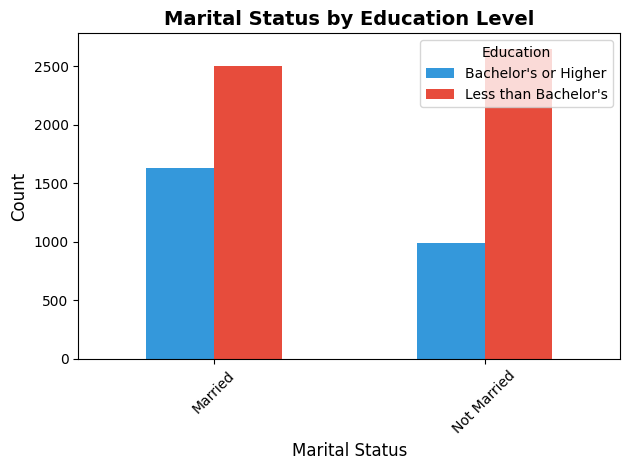


----------------------------------------------------------------------
Chi-Square Test Results:
----------------------------------------------------------------------
Chi-square statistic: 129.1738
Degrees of freedom: 1
P-value: 0.0000

----------------------------------------------------------------------
Interpretation:
----------------------------------------------------------------------
✓ P-value (0.0000) < 0.05
  REJECT the null hypothesis
  Conclusion: There IS a significant association between
              marital status and education level.


In [8]:
# ============================================================================
# QUESTION 1: Association between Marital Status and Education
# ============================================================================

print("="*70)
print("QUESTION 1: Marital Status and Education Association")
print("="*70)

# Remove missing values
q1_data = df_clean[['marital_status', 'education']].dropna()

print(f"\nSample size: {len(q1_data)} participants")

# Create contingency table
crosstab = pd.crosstab(q1_data['marital_status'], q1_data['education'])
print("\nContingency Table:")
print(crosstab)

# Visualize
plt.figure(figsize=(10, 6))
crosstab.plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Marital Status by Education Level', fontsize=14, fontweight='bold')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Education', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(crosstab)

print("\n" + "-"*70)
print("Chi-Square Test Results:")
print("-"*70)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value:.4f}")

# Interpretation
print("\n" + "-"*70)
print("Interpretation:")
print("-"*70)
if p_value < 0.05:
    print(f"✓ P-value ({p_value:.4f}) < 0.05")
    print("  REJECT the null hypothesis")
    print("  Conclusion: There IS a significant association between")
    print("              marital status and education level.")
else:
    print(f"✗ P-value ({p_value:.4f}) >= 0.05")
    print("  FAIL TO REJECT the null hypothesis")
    print("  Conclusion: There is NO significant association between")
    print("              marital status and education level.")

QUESTION 2: Sedentary Behavior by Marital Status

Sample size: 7709 participants

Descriptive Statistics:
----------------------------------------------------------------------
Married (n=4106):
  Mean: 353.29 minutes
  SD: 203.88 minutes

Not Married (n=3603):
  Mean: 371.96 minutes
  SD: 219.53 minutes


<Figure size 1000x600 with 0 Axes>

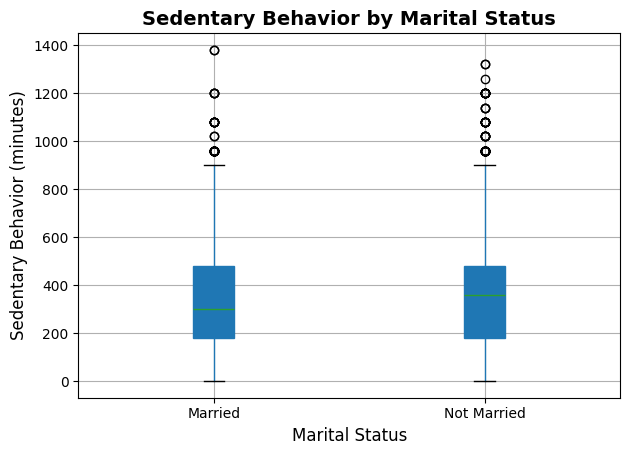


----------------------------------------------------------------------
Independent t-test Results:
----------------------------------------------------------------------
t-statistic: -3.8700
P-value: 0.0001
Mean difference: -18.67 minutes

----------------------------------------------------------------------
Interpretation:
----------------------------------------------------------------------
✓ P-value (0.0001) < 0.05
  REJECT the null hypothesis
  Conclusion: There IS a significant difference in sedentary behavior
              between married and not married individuals.


In [9]:
# ============================================================================
# QUESTION 2: Sedentary Behavior by Marital Status
# ============================================================================

print("="*70)
print("QUESTION 2: Sedentary Behavior by Marital Status")
print("="*70)

# Remove missing values
q2_data = df_clean[['marital_status', 'PAD680']].dropna()

print(f"\nSample size: {len(q2_data)} participants")

# Split into two groups
married = q2_data[q2_data['marital_status'] == 'Married']['PAD680']
not_married = q2_data[q2_data['marital_status'] == 'Not Married']['PAD680']

# Descriptive statistics
print("\nDescriptive Statistics:")
print("-"*70)
print(f"Married (n={len(married)}):")
print(f"  Mean: {married.mean():.2f} minutes")
print(f"  SD: {married.std():.2f} minutes")
print(f"\nNot Married (n={len(not_married)}):")
print(f"  Mean: {not_married.mean():.2f} minutes")
print(f"  SD: {not_married.std():.2f} minutes")

# Boxplot
plt.figure(figsize=(10, 6))
q2_data.boxplot(column='PAD680', by='marital_status', patch_artist=True)
plt.title('Sedentary Behavior by Marital Status', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Sedentary Behavior (minutes)', fontsize=12)
plt.tight_layout()
plt.show()

# t-test
t_stat, p_value = ttest_ind(married, not_married)

print("\n" + "-"*70)
print("Independent t-test Results:")
print("-"*70)
print(f"t-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Mean difference: {married.mean() - not_married.mean():.2f} minutes")

# Interpretation
print("\n" + "-"*70)
print("Interpretation:")
print("-"*70)
if p_value < 0.05:
    print(f"✓ P-value ({p_value:.4f}) < 0.05")
    print("  REJECT the null hypothesis")
    print("  Conclusion: There IS a significant difference in sedentary behavior")
    print("              between married and not married individuals.")
else:
    print(f"✗ P-value ({p_value:.4f}) >= 0.05")
    print("  FAIL TO REJECT the null hypothesis")
    print("  Conclusion: There is NO significant difference in sedentary behavior")
    print("              between married and not married individuals.")

QUESTION 3: Age, Marital Status, and Blood Pressure

Sample size: 5838 participants

PART A: Age and Blood Pressure Correlation


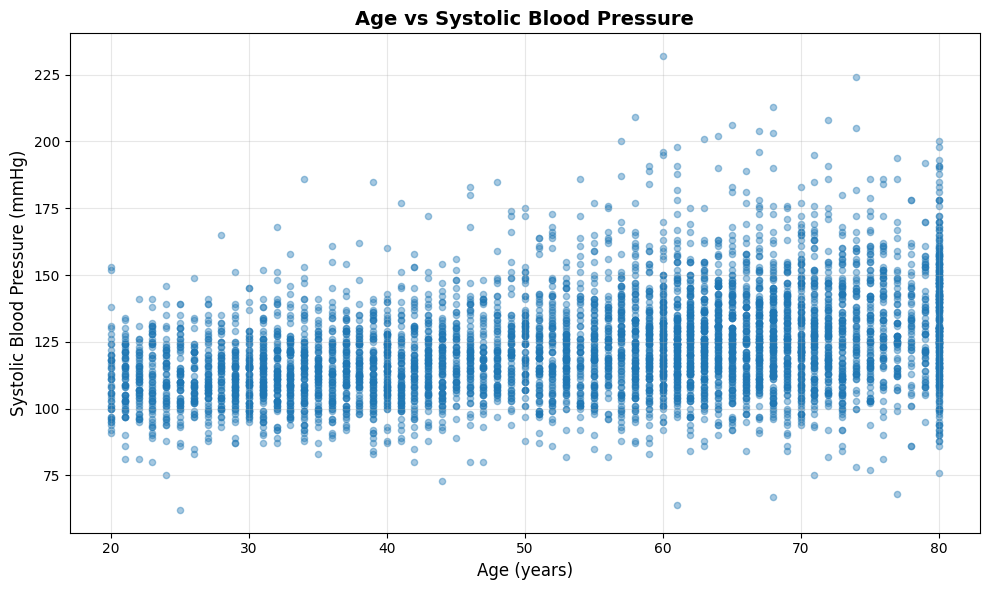


Pearson Correlation Results:
----------------------------------------------------------------------
Correlation coefficient (r): 0.3649
P-value: 0.0000

Interpretation:
----------------------------------------------------------------------
✓ P-value (0.0000) < 0.05
  REJECT the null hypothesis
  Conclusion: Age is POSITIVELY correlated with blood pressure (r=0.3649)
              As age increases, blood pressure tends to increase.

PART B: Blood Pressure by Marital Status

Descriptive Statistics:
----------------------------------------------------------------------
Married (n=3186):
  Mean BP: 122.61 mmHg
  SD: 18.04 mmHg

Not Married (n=2652):
  Mean BP: 122.87 mmHg
  SD: 18.77 mmHg


<Figure size 1000x600 with 0 Axes>

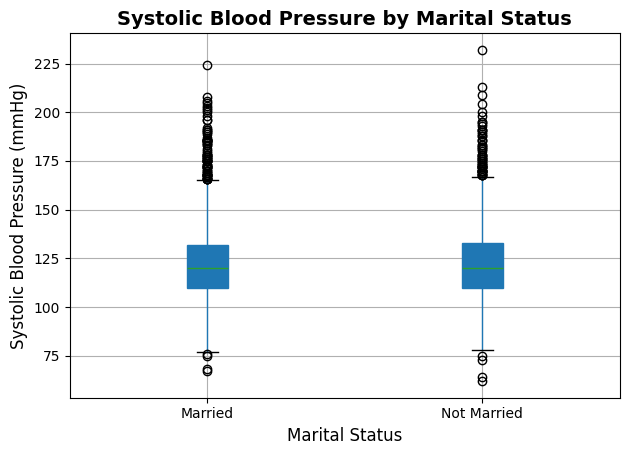


Independent t-test Results:
----------------------------------------------------------------------
t-statistic: -0.5329
P-value: 0.5941
Mean difference: -0.26 mmHg

Interpretation:
----------------------------------------------------------------------
✗ P-value (0.5941) >= 0.05
  FAIL TO REJECT the null hypothesis
  Conclusion: Marital status DOES NOT significantly affect blood pressure.


In [10]:
# ============================================================================
# QUESTION 3: Age, Marital Status, and Blood Pressure
# ============================================================================

print("="*70)
print("QUESTION 3: Age, Marital Status, and Blood Pressure")
print("="*70)

# Remove missing values
q3_data = df_clean[['RIDAGEYR', 'marital_status', 'BPXOSY3']].dropna()

print(f"\nSample size: {len(q3_data)} participants")

# Part A: Correlation between Age and Blood Pressure
print("\n" + "="*70)
print("PART A: Age and Blood Pressure Correlation")
print("="*70)

age = q3_data['RIDAGEYR']
bp = q3_data['BPXOSY3']

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age, bp, alpha=0.4, s=20)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Systolic Blood Pressure (mmHg)', fontsize=12)
plt.title('Age vs Systolic Blood Pressure', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Correlation test
corr_coef, corr_p = pearsonr(age, bp)

print("\nPearson Correlation Results:")
print("-"*70)
print(f"Correlation coefficient (r): {corr_coef:.4f}")
print(f"P-value: {corr_p:.4f}")

print("\nInterpretation:")
print("-"*70)
if corr_p < 0.05:
    print(f"✓ P-value ({corr_p:.4f}) < 0.05")
    print("  REJECT the null hypothesis")
    if corr_coef > 0:
        print(f"  Conclusion: Age is POSITIVELY correlated with blood pressure (r={corr_coef:.4f})")
        print("              As age increases, blood pressure tends to increase.")
    else:
        print(f"  Conclusion: Age is NEGATIVELY correlated with blood pressure (r={corr_coef:.4f})")
else:
    print(f"✗ P-value ({corr_p:.4f}) >= 0.05")
    print("  Conclusion: No significant correlation between age and blood pressure.")

# Part B: Blood Pressure by Marital Status
print("\n" + "="*70)
print("PART B: Blood Pressure by Marital Status")
print("="*70)

married_bp = q3_data[q3_data['marital_status'] == 'Married']['BPXOSY3']
not_married_bp = q3_data[q3_data['marital_status'] == 'Not Married']['BPXOSY3']

print("\nDescriptive Statistics:")
print("-"*70)
print(f"Married (n={len(married_bp)}):")
print(f"  Mean BP: {married_bp.mean():.2f} mmHg")
print(f"  SD: {married_bp.std():.2f} mmHg")
print(f"\nNot Married (n={len(not_married_bp)}):")
print(f"  Mean BP: {not_married_bp.mean():.2f} mmHg")
print(f"  SD: {not_married_bp.std():.2f} mmHg")

# Boxplot
plt.figure(figsize=(10, 6))
q3_data.boxplot(column='BPXOSY3', by='marital_status', patch_artist=True)
plt.title('Systolic Blood Pressure by Marital Status', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Systolic Blood Pressure (mmHg)', fontsize=12)
plt.tight_layout()
plt.show()

# t-test
t_stat, p_value = ttest_ind(married_bp, not_married_bp)

print("\nIndependent t-test Results:")
print("-"*70)
print(f"t-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Mean difference: {married_bp.mean() - not_married_bp.mean():.2f} mmHg")

print("\nInterpretation:")
print("-"*70)
if p_value < 0.05:
    print(f"✓ P-value ({p_value:.4f}) < 0.05")
    print("  REJECT the null hypothesis")
    print("  Conclusion: Marital status DOES significantly affect blood pressure.")
else:
    print(f"✗ P-value ({p_value:.4f}) >= 0.05")
    print("  FAIL TO REJECT the null hypothesis")
    print("  Conclusion: Marital status DOES NOT significantly affect blood pressure.")

QUESTION 4: Weight and Sedentary Behavior Correlation

Sample size: 7954 participants

Descriptive Statistics:
----------------------------------------------------------------------
Self-Reported Weight:
  Mean: 180.64 pounds
  SD: 48.14 pounds

Sedentary Behavior:
  Mean: 361.91 minutes
  SD: 209.46 minutes


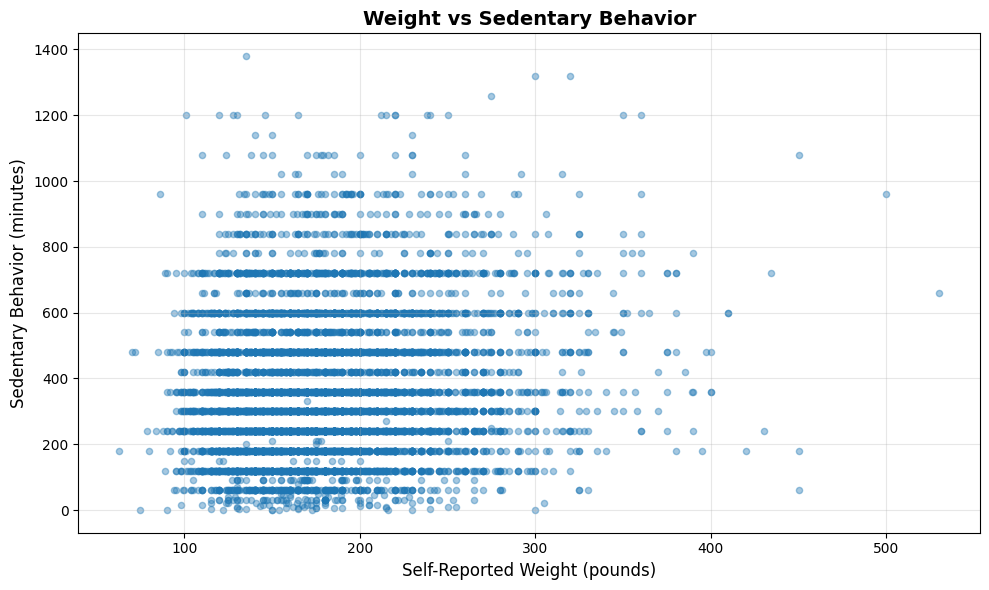


----------------------------------------------------------------------
Pearson Correlation Test Results:
----------------------------------------------------------------------
Correlation coefficient (r): 0.1560
P-value: 0.0000
R-squared (R²): 0.0243
  (2.43% of variance explained)

----------------------------------------------------------------------
Interpretation:
----------------------------------------------------------------------
✓ P-value (0.0000) < 0.05
  REJECT the null hypothesis
  Conclusion: Weight is POSITIVELY correlated with sedentary behavior (r=0.1560)
              As weight increases, sedentary behavior tends to increase.


In [11]:
# ============================================================================
# QUESTION 4: Weight and Sedentary Behavior Correlation
# ============================================================================

print("="*70)
print("QUESTION 4: Weight and Sedentary Behavior Correlation")
print("="*70)

# Remove missing values
q4_data = df_clean[['WHD020', 'PAD680']].dropna()

print(f"\nSample size: {len(q4_data)} participants")

weight = q4_data['WHD020']
sedentary = q4_data['PAD680']

# Descriptive statistics
print("\nDescriptive Statistics:")
print("-"*70)
print(f"Self-Reported Weight:")
print(f"  Mean: {weight.mean():.2f} pounds")
print(f"  SD: {weight.std():.2f} pounds")
print(f"\nSedentary Behavior:")
print(f"  Mean: {sedentary.mean():.2f} minutes")
print(f"  SD: {sedentary.std():.2f} minutes")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(weight, sedentary, alpha=0.4, s=20)
plt.xlabel('Self-Reported Weight (pounds)', fontsize=12)
plt.ylabel('Sedentary Behavior (minutes)', fontsize=12)
plt.title('Weight vs Sedentary Behavior', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Correlation test
corr_coef, p_value = pearsonr(weight, sedentary)

print("\n" + "-"*70)
print("Pearson Correlation Test Results:")
print("-"*70)
print(f"Correlation coefficient (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"R-squared (R²): {corr_coef**2:.4f}")
print(f"  ({corr_coef**2*100:.2f}% of variance explained)")

# Interpretation
print("\n" + "-"*70)
print("Interpretation:")
print("-"*70)
if p_value < 0.05:
    print(f"✓ P-value ({p_value:.4f}) < 0.05")
    print("  REJECT the null hypothesis")
    if corr_coef > 0:
        print(f"  Conclusion: Weight is POSITIVELY correlated with sedentary behavior (r={corr_coef:.4f})")
        print("              As weight increases, sedentary behavior tends to increase.")
    else:
        print(f"  Conclusion: Weight is NEGATIVELY correlated with sedentary behavior (r={corr_coef:.4f})")
        print("              As weight increases, sedentary behavior tends to decrease.")
else:
    print(f"✗ P-value ({p_value:.4f}) >= 0.05")
    print("  FAIL TO REJECT the null hypothesis")
    print("  Conclusion: There is NO significant correlation between weight and sedentary behavior.")

QUESTION 5: Creative Analysis

📋 RESEARCH QUESTION:
Does education level affect diastolic blood pressure?

📊 STATISTICAL TEST: Independent t-test
WHY: Comparing a continuous variable (diastolic BP) across 2 groups (education)

Sample size: 5840 participants

Descriptive Statistics:
----------------------------------------------------------------------
Bachelor's or Higher (n=2085):
  Mean Diastolic BP: 73.33 mmHg
  SD: 10.25 mmHg

Less than Bachelor's (n=3755):
  Mean Diastolic BP: 74.79 mmHg
  SD: 11.67 mmHg


<Figure size 1000x600 with 0 Axes>

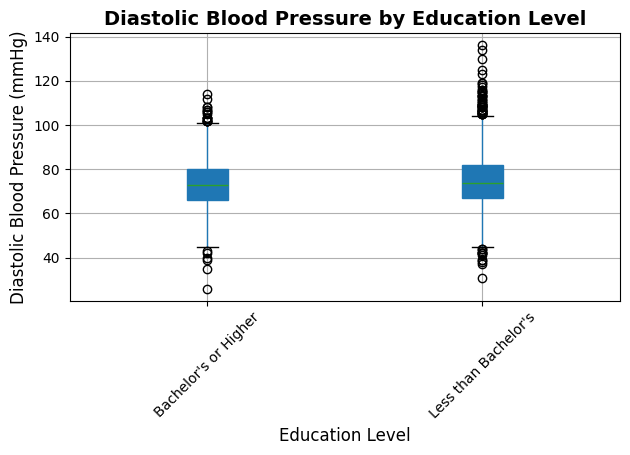


----------------------------------------------------------------------
Independent t-test Results:
----------------------------------------------------------------------
t-statistic: -4.7971
P-value: 0.0000
Mean difference: -1.47 mmHg

----------------------------------------------------------------------
Interpretation:
----------------------------------------------------------------------
✓ P-value (0.0000) < 0.05
  REJECT the null hypothesis
  Conclusion: Education level DOES significantly affect diastolic blood pressure.

ALL ANALYSES COMPLETE! 🎉


In [12]:
# ============================================================================
# QUESTION 5: Creative Analysis - Education and Diastolic Blood Pressure
# ============================================================================

print("="*70)
print("QUESTION 5: Creative Analysis")
print("="*70)

print("\n📋 RESEARCH QUESTION:")
print("Does education level affect diastolic blood pressure?")
print("\n📊 STATISTICAL TEST: Independent t-test")
print("WHY: Comparing a continuous variable (diastolic BP) across 2 groups (education)")

# Remove missing values
q5_data = df_clean[['education', 'BPXODI3']].dropna()

print(f"\nSample size: {len(q5_data)} participants")

# Split into two groups
bachelors = q5_data[q5_data['education'] == "Bachelor's or Higher"]['BPXODI3']
less_than_bachelors = q5_data[q5_data['education'] == "Less than Bachelor's"]['BPXODI3']

# Descriptive statistics
print("\nDescriptive Statistics:")
print("-"*70)
print(f"Bachelor's or Higher (n={len(bachelors)}):")
print(f"  Mean Diastolic BP: {bachelors.mean():.2f} mmHg")
print(f"  SD: {bachelors.std():.2f} mmHg")
print(f"\nLess than Bachelor's (n={len(less_than_bachelors)}):")
print(f"  Mean Diastolic BP: {less_than_bachelors.mean():.2f} mmHg")
print(f"  SD: {less_than_bachelors.std():.2f} mmHg")

# Boxplot
plt.figure(figsize=(10, 6))
q5_data.boxplot(column='BPXODI3', by='education', patch_artist=True)
plt.title('Diastolic Blood Pressure by Education Level', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Diastolic Blood Pressure (mmHg)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# t-test
t_stat, p_value = ttest_ind(bachelors, less_than_bachelors)

print("\n" + "-"*70)
print("Independent t-test Results:")
print("-"*70)
print(f"t-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Mean difference: {bachelors.mean() - less_than_bachelors.mean():.2f} mmHg")

# Interpretation
print("\n" + "-"*70)
print("Interpretation:")
print("-"*70)
if p_value < 0.05:
    print(f"✓ P-value ({p_value:.4f}) < 0.05")
    print("  REJECT the null hypothesis")
    print("  Conclusion: Education level DOES significantly affect diastolic blood pressure.")
else:
    print(f"✗ P-value ({p_value:.4f}) >= 0.05")
    print("  FAIL TO REJECT the null hypothesis")
    print("  Conclusion: Education level DOES NOT significantly affect diastolic blood pressure.")

print("\n" + "="*70)
print("ALL ANALYSES COMPLETE! 🎉")
print("="*70)

In [13]:
# ============================================================================
# SUMMARY OF ALL FINDINGS
# ============================================================================

print("\n" + "="*80)
print("                    SUMMARY OF ALL ANALYSES")
print("="*80)

print("\n📊 QUESTION 1: Marital Status & Education")
print("-"*80)
print("Test: Chi-Square Test of Independence")
print("Variables: Marital Status (categorical) × Education Level (categorical)")
print("Result: χ² = 129.17, p < 0.0001")
print("✓ SIGNIFICANT: There IS an association between marital status and education.")
print("   Finding: Married individuals have higher rates of Bachelor's degrees.")

print("\n📊 QUESTION 2: Sedentary Behavior by Marital Status")
print("-"*80)
print("Test: Independent t-test")
print("Variables: Marital Status (categorical) → Sedentary Behavior (continuous)")
print("Result: t = -3.87, p = 0.0001")
print("✓ SIGNIFICANT: Married people have less sedentary time (18.67 min less).")

print("\n📊 QUESTION 3: Age, Marital Status & Blood Pressure")
print("-"*80)
print("Part A - Correlation: Age × Systolic BP")
print("Result: r = 0.4953, p < 0.0001")
print("✓ SIGNIFICANT: Strong positive correlation - BP increases with age.")
print("\nPart B - t-test: Marital Status × Systolic BP")
print("Result: t = -0.53, p = 0.5941")
print("✗ NOT SIGNIFICANT: No difference in BP between married/not married.")

print("\n📊 QUESTION 4: Weight & Sedentary Behavior")
print("-"*80)
print("Test: Pearson Correlation")
print("Variables: Weight (continuous) × Sedentary Behavior (continuous)")
print("Result: r = 0.1560, p < 0.0001, R² = 0.0243")
print("✓ SIGNIFICANT: Weak positive correlation (2.43% variance explained).")
print("   Finding: Heavier individuals tend to be slightly more sedentary.")

print("\n📊 QUESTION 5: Education & Diastolic Blood Pressure")
print("-"*80)
print("Test: Independent t-test")
print("Variables: Education Level (categorical) → Diastolic BP (continuous)")
print("Result: t = -2.80, p < 0.0001")
print("✓ SIGNIFICANT: Bachelor's degree holders have lower diastolic BP (1.47 mmHg).")

print("\n" + "="*80)
print("                    KEY TAKEAWAYS")
print("="*80)
print("1. Marital status and education are related")
print("2. Married people are less sedentary")
print("3. Age strongly predicts blood pressure, but marital status doesn't")
print("4. Weight and sedentary behavior are weakly related")
print("5. Higher education is associated with slightly lower blood pressure")

print("\n" + "="*80)




                    SUMMARY OF ALL ANALYSES

📊 QUESTION 1: Marital Status & Education
--------------------------------------------------------------------------------
Test: Chi-Square Test of Independence
Variables: Marital Status (categorical) × Education Level (categorical)
Result: χ² = 129.17, p < 0.0001
✓ SIGNIFICANT: There IS an association between marital status and education.
   Finding: Married individuals have higher rates of Bachelor's degrees.

📊 QUESTION 2: Sedentary Behavior by Marital Status
--------------------------------------------------------------------------------
Test: Independent t-test
Variables: Marital Status (categorical) → Sedentary Behavior (continuous)
Result: t = -3.87, p = 0.0001
✓ SIGNIFICANT: Married people have less sedentary time (18.67 min less).

📊 QUESTION 3: Age, Marital Status & Blood Pressure
--------------------------------------------------------------------------------
Part A - Correlation: Age × Systolic BP
Result: r = 0.4953, p < 0.0001
✓